# Kodexempel för premium-API
Denna kodresurs använder sig av Jupyter notebooks, vilket du kan köra direkt i webbläsaren hos [Google Colab](https://colab.research.google.com/) ifall du har ett Google-konto. Om du kan installera saker på din dator är också [Anaconda + Jupyter](https://www.anaconda.com/products/distribution) ett bra val.

Nedan visas några exempel på hur du kan jobba med Webperfs API som premiumanvändare.

Har du inte premium? Du kan testköra API:t med följande API-nyckel _989089bfe899d6992ff320a97_, det är en demoanvändare för Webperf.se, site _3843_ när det behöver anges.

## 0. Hämta mitt site_id

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [1]:
import requests
import json

api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key }

r = requests.get(f'https://api.webperf.se/stats/', headers=headers)
json_data = json.loads(r.text)

mitt_site_id = json_data[0]["site-ID"]
print(f'Mitt site-ID är: {mitt_site_id}')

Mitt site-ID är: 3843


## 1. Hämta era senaste resultat

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [2]:
import requests
import json

mitt_site_id = mitt_site_id # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key }

r = requests.get(f'https://api.webperf.se/stats/{mitt_site_id}', headers=headers)

json_data_senaste_resultat = json.loads(r.text)

for metadata in json_data_senaste_resultat:
    if metadata != 'data':
        print(f'{metadata}: {json_data_senaste_resultat[metadata]}')

for rapport in json_data_senaste_resultat['data']:
    rapport_lista = dict(rapport)
    print(f"#################################\nTyp av test: {rapport_lista['type_of_test']}")
    print(f"Test kördes: {rapport_lista['test_date']}")
    print(f"Betyg: {rapport_lista['rating']} av 5")
    
    if len(rapport_lista['check_report']) > 0:
        print(f"\nRapport:\n{rapport_lista['check_report']}")
    if len(rapport_lista['check_report_a11y']) > 0:
        print(f"\nTillgänglighetsrapport:\n{rapport_lista['check_report_a11y']}")
    if len(rapport_lista['check_report_perf']) > 0:
        print(f"\nPrestandarapport:\n{rapport_lista['check_report_perf']}")
    if len(rapport_lista['check_report_sec']) > 0:
        print(f"\nSäkerhetsrapport:\n{rapport_lista['check_report_sec']}")
    if len(rapport_lista['check_report_stand']) > 0:
        print(f"\nRapport om webbstandard:\n{rapport_lista['check_report_stand']}")

api_version: 0.1
result_count: 18
timestamp: 2023-09-08 19:17:00.626238
uri: https://api.webperf.se/item/3843
#################################
Typ av test: 25
Test kördes: 2023-09-08 19:11:21
Betyg: 1.84 av 5

Rapport:
- Teknik: matomo, php, js, sass, scss, typescript, mysql
- Licenser: mit, gpl-3.0
- Metadata: open-graph, viewport, referrer, dns-prefetch, canonical, apple-touch-icon, icon
- JS ramverk/bibliotek: jquery, bootstrap, angular, theia-sticky-sidebar, matomo
- Språk: sv
- Bildformat: png, webp


Säkerhetsrapport:
- Uppdatering(ar) tillgängliga ( 1.84 betyg )

#################################
Typ av test: 23
Test kördes: 2023-09-08 19:10:45
Betyg: 4.20 av 5

Säkerhetsrapport:
- Kakor ( 1.00 betyg )
  - Inget krav på säker överföring: 2 ( 1.00 betyg )
  - Inget krav på säker överföring: 2 ( 1.00 betyg )
- Dataskyddsförordningen och Schrems II-domen ( 5.00 betyg )
  - Antal olika länder: 1
  - Sidan skickades från Sverige: Ja
- Spårning ( 5.00 betyg )
  - #51: piwik.js - Spår

## 2. Hämta era historiska resultat

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [3]:
import requests
import json

mitt_site_id = mitt_site_id # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key }

r = requests.get(f'https://api.webperf.se/stats_per_month/{mitt_site_id}', headers=headers)

json_data_historik = json.loads(r.text)

for metadata in json_data_historik:
    if metadata != 'data':
        print(f'{metadata}: {json_data_historik[metadata]}')

for rapport in json_data_historik['data']:
    rapport_lista = dict(rapport)
    
    print(f'{rapport_lista["timeperiod"]} var betyget {rapport_lista["score"]} i {rapport_lista["type_of_score"]}')
    

api_version: 0.1
result_count: 241
timestamp: 2023-09-08 19:17:10.327293
uri: https://api.webperf.se/item/3843
2023-08 var betyget 4.17 i kat-infosec
2023-08 var betyget 4.42 i kat-total
2023-08 var betyget 4.61 i kat-perf
2023-08 var betyget 5.00 i kat-a11y
2023-08 var betyget 4.98 i kat-webstandard
2023-07 var betyget 4.46 i kat-total
2023-07 var betyget 4.23 i kat-infosec
2023-07 var betyget 5.00 i kat-a11y
2023-07 var betyget 4.60 i kat-perf
2023-07 var betyget 4.98 i kat-webstandard
2023-06 var betyget 4.25 i kat-infosec
2023-06 var betyget 5.00 i kat-a11y
2023-06 var betyget 4.49 i kat-total
2023-06 var betyget 4.98 i kat-webstandard
2023-06 var betyget 4.57 i kat-perf
2023-05 var betyget 4.30 i kat-infosec
2023-05 var betyget 5.00 i kat-a11y
2023-05 var betyget 4.59 i kat-perf
2023-05 var betyget 4.50 i kat-total
2023-05 var betyget 4.98 i kat-webstandard
2023-04 var betyget 4.98 i kat-webstandard
2023-04 var betyget 5.00 i kat-a11y
2023-04 var betyget 4.37 i kat-total
2023-04 v

## 2.1 Använd dina historiska resultat i pandas
Pandas är ett kraftfullt verktyg för att jobba med datakällor.

Förutsätter:
* [pandas](https://pandasguide.readthedocs.io/)

In [4]:
import pandas as pd
from pandas import json_normalize

df = json_normalize(json_data_historik['data']) 

print(df.head)
print(df)

<bound method NDFrame.head of     data_id score timeperiod    type_of_score
0    764627  4.17    2023-08      kat-infosec
1    775166  4.42    2023-08        kat-total
2    760976  4.61    2023-08         kat-perf
3    768066  5.00    2023-08         kat-a11y
4    771621  4.98    2023-08  kat-webstandard
..      ...   ...        ...              ...
236  121646  4.25    2019-08         kat-a11y
237   62800  4.00    2019-08      kat-infosec
238  243880  4.05    2019-08  kat-webstandard
239   11426  3.86    2019-08         kat-perf
240  307924  3.72    2019-08        kat-total

[241 rows x 4 columns]>
    data_id score timeperiod    type_of_score
0    764627  4.17    2023-08      kat-infosec
1    775166  4.42    2023-08        kat-total
2    760976  4.61    2023-08         kat-perf
3    768066  5.00    2023-08         kat-a11y
4    771621  4.98    2023-08  kat-webstandard
..      ...   ...        ...              ...
236  121646  4.25    2019-08         kat-a11y
237   62800  4.00    2019

## 2.2 Visualisera historiska resultat
Kör ovanstående kodcell (2.) först för att hämta din data från API:t.

Förutsätter:
* [pandas](https://pandasguide.readthedocs.io/)
* [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

<AxesSubplot:>

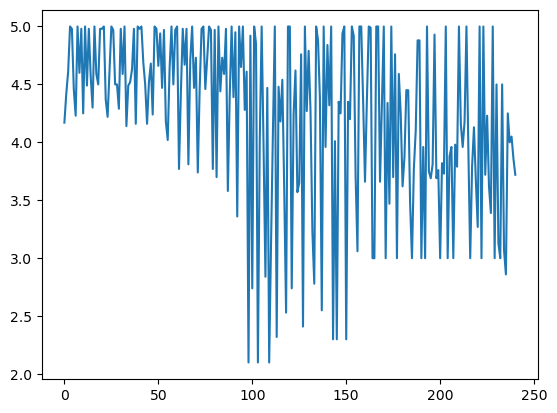

In [5]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

plt.close("all")

df = json_normalize(json_data_historik['data'])

ts = pd.Series(df["score"].astype(float))
ts.plot()

## 3. Aktivera tester

## 3.1 Testa om startsida

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [6]:
import requests
import json

mitt_site_id = 3843 # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key, "site-id" : str(mitt_site_id) }

r = requests.post('https://api.webperf.se/retest/', headers=headers)

json_data_historik = json.loads(r.text)
if r.status_code == 200:
    print('API:t säger "', json_data_historik[0]['message'], '"')
else:
    print(f'Något funkade inte. Felkod: {r.status_code}')

API:t säger " Website with site-id 3843 will be retested in a couple of minutes "


## 3.2 Starta multipla engångstester av undersidor (så kallade "privata tester")
Det går att testa upp till 10 valfria undersidor per anrop till API:t. Antalet sidor du kan testa styrs av vilken nivå av premium din webbplats har. Ifall du har en av de större premium-varianterna har du utrymme att göra flera API-postningar i följd och sedan invänta att testresultaten kommer in under de 15-30 minuter det brukar kunna ta.

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [7]:
import requests
import json

mitt_site_id = 3843 # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key, "site-id" : str(mitt_site_id) }
payload = {'urls':'https://webperf.se/category/trafik-och-biljett/, https://webperf.se/site/nimbleinitiatives_com/'}

r = requests.post(f'https://api.webperf.se/0.1/test_once/', headers=headers, data=payload)

json_data_historik = json.loads(r.text)
if r.status_code == 200:
    print('API:t säger "', json_data_historik[0]['message'], '"')
else:
    print(f'Något funkade inte. Felkod: {r.status_code}')

API:t säger " A once only test for 2 URL's belonging to site-id 3843 will be performed in a couple of minutes. The endpoint(s) is/are: {6472: 'https://api.webperf.se/private_stats/3843/6472', 6360: 'https://api.webperf.se/private_stats/3843/6360'} "


## 3.3 Hämta lista med "privata tester"
Dessa kallas privata tester eftersom de inte är åtkomliga öppet på Webperf.se eller andra användare av API:t än de med din behörighet.

Med nedan API-svar får du ut URI:er för att hämta ut samtliga testresultat för en privat testad URL. Denna API-URI kräver att du anger din API-nyckel för att få ut svaret, se 3.4 nedan.

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [8]:
import requests
import json

mitt_site_id = 3843 # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key }

r = requests.get(f'https://api.webperf.se/0.1/private_stats/{mitt_site_id}', headers=headers)

#print(r.text)

try:
    json_data_urls = json.loads(r.text)
    for item in json_data_urls['data']:
        print(f"URL {item['url']}\nLades till {item['date_added']}\nURI för att hämta ut data {item['uri']}, men glöm inte din API-nyckel\n")
except:
    print(f'Något funkade inte. Felkod: {r.status_code}')

URL https://webperf.se/articles/mjukvara-test/
Lades till 2023-03-26 00:32:28
URI för att hämta ut data https://api.webperf.se/0.1/private_stats/3843/6156, men glöm inte din API-nyckel

URL https://webperf.se/toplist/
Lades till 2023-07-15 21:54:29
URI för att hämta ut data https://api.webperf.se/0.1/private_stats/3843/6356, men glöm inte din API-nyckel

URL https://webperf.se/om/
Lades till 2023-07-15 21:54:29
URI för att hämta ut data https://api.webperf.se/0.1/private_stats/3843/6357, men glöm inte din API-nyckel

URL https://webperf.se/erbjudande/
Lades till 2023-07-15 21:54:29
URI för att hämta ut data https://api.webperf.se/0.1/private_stats/3843/6358, men glöm inte din API-nyckel

URL https://webperf.se/category/trafik-och-biljett/
Lades till 2023-07-15 22:07:50
URI för att hämta ut data https://api.webperf.se/0.1/private_stats/3843/6359, men glöm inte din API-nyckel

URL https://webperf.se/site/nimbleinitiatives_com/
Lades till 2023-07-15 22:07:50
URI för att hämta ut data http

## 3.4 Hämta testresultat för ett av dina "privata tester"
Bara de med API-åtkomst till webbplatsen hos Webperf eller inloggade i Premium kan komma åt dessa resultat. De delas inte öppet.

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [9]:
import requests
import json

mitt_site_id = 3843 # 3843 för demoanvändare för Webperf.se
test_id = 6359
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api-key" : api_key }

r = requests.get(f'https://api.webperf.se/0.1/private_stats/{mitt_site_id}/{test_id}', headers=headers)

#print(r.text)

try:
    json_data_url_result = json.loads(r.text)
    
    for metadata in json_data_url_result:
        if metadata != 'data':
            print(f'{metadata}: {json_data_url_result[metadata]}')

    for rapport in json_data_url_result['data']:
        rapport_lista = dict(rapport)
        print(f"#################################\nTyp av test: {rapport_lista['type_of_test']}")
        print(f"Test kördes: {rapport_lista['test_date']}")
        print(f"Betyg: {rapport_lista['rating']} av 5")

        if len(rapport_lista['check_report']) > 0:
            print(f"\nRapport:\n{rapport_lista['check_report']}")
        if len(rapport_lista['check_report_a11y']) > 0:
            print(f"\nTillgänglighetsrapport:\n{rapport_lista['check_report_a11y']}")
        if len(rapport_lista['check_report_perf']) > 0:
            print(f"\nPrestandarapport:\n{rapport_lista['check_report_perf']}")
        if len(rapport_lista['check_report_sec']) > 0:
            print(f"\nSäkerhetsrapport:\n{rapport_lista['check_report_sec']}")
        if len(rapport_lista['check_report_stand']) > 0:
            print(f"\nRapport om webbstandard:\n{rapport_lista['check_report_stand']}")
except:
    print(f'Något funkade inte. Felkod: {r.status_code}')

api_version: 0.1
result_count: 18
timestamp: 2023-09-08 19:18:45.759045
uri: https://api.webperf.se/0.1/private_stats/3843/6359
#################################
Typ av test: 17
Test kördes: 2023-08-07 11:57:00
Betyg: 4.55 av 5

Rapport:
- Webbplatsen är bra.
 ( 4.55 betyg )
- Sidans storlek ( 4.65 betyg )
- Andelen resurser för sidan ( 4.85 betyg )
- Sidans DOM-komplexitet ( 5.00 betyg )
- Sidans Javascript-komplexitet ( 4.90 betyg )
- Sidans användning av dålig Javascript ( 5.00 betyg )
- Sidans användning av jQuery ( 3.50 betyg )
- Sidans CSS-komplexitet ( 3.25 betyg )
- Sidans användning av dålig CSS ( 3.70 betyg )
- Sidans användning av webbtypsnitt ( 3.15 betyg )
- Server konfiguration ( 4.70 betyg )


Prestandarapport:
- Användning av iframe ( 5.00 betyg )
- Exikveringstid för Javascript ( 5.00 betyg )
- DOM åtkomst ( 5.00 betyg )
- Händelser knutna till Scroll ( 4.30 betyg )
- document.write anrop ( 5.00 betyg )
- Synkrona Ajax anrop ( 5.00 betyg )
- Antal regler ( 4.05 betyg )